Import Dependencies and Pretrained Model
(Here we are using a pretrained model)

In [ ]:
#Install the following dependencies before running the model
! pip install ipywidgets
! pip install tensorflow-hub

In [2]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [5]:
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from PIL import Image
import ipywidgets as widgets
from IPython.display import display
import io 

In [6]:
#Loading the model using the tensorflow hub
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

## Loading Images to the Folders

FileUpload(value=(), accept='image/*', description='Upload')

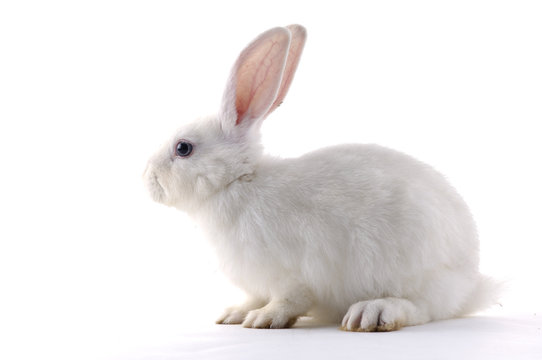

Image saved successfully at: images/rabit.jpg


In [54]:
#Save paths of image and style
path=[]

#UPLOAD IMAGES to be styled in the folder
image_uploader = widgets.FileUpload(accept='image/*', multiple=False)  # For a single image

# Function to handle the uploaded image
def handle_upload(change):
    # Get the uploaded file
    uploaded_file = image_uploader.value
    if uploaded_file:
        for file_info in uploaded_file:
            # Read the uploaded image data
            image_data = file_info['content']
            # Open the image using PIL
            image = Image.open(io.BytesIO(image_data))
            # Display the image
            display(image)

            
            save_path = os.path.join("images", file_info['name'])
            with open(save_path, 'wb') as f:
                f.write(image_data)
            print(f"Image saved successfully at: {save_path}")
            path.append(save_path)

# Set the upload handler
image_uploader.observe(handle_upload, names='value')

# Display the upload widget
display(image_uploader)


FileUpload(value=(), accept='image/*', description='Upload')

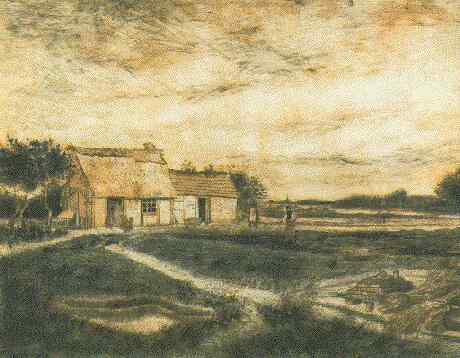

Style saved successfully at: styles/style1.jpg


In [55]:
#UPLOAD STYLEs to be used in the folder
style_uploader = widgets.FileUpload(accept='image/*', multiple=False)  # For a single image


# Function to handle the uploaded image
def handle_upload(change):
    # Get the uploaded file
    uploaded_file = style_uploader.value
    if uploaded_file:
        for file_info in uploaded_file:
            # Read the uploaded image data
            image_data = file_info['content']
            # Open the image using PIL
            image = Image.open(io.BytesIO(image_data))
            # Display the image
            display(image)
            
            save_path = os.path.join("styles", file_info['name'])
            with open(save_path, 'wb') as f:
                f.write(image_data)
            print(f"Style saved successfully at: {save_path}")
            path.append(save_path)

# Set the upload handler
style_uploader.observe(handle_upload, names='value')

# Display the upload widget
display(style_uploader)


## Preprocess Images

In [56]:
#function to load the image
def load_image(image_path):
  img = tf.io.read_file(image_path) #reading the image path
  img = tf.image.decode_image(img, channels=3) #decode the binary image data, also specifies that the image should have three channels (RGB)
  img = tf.image.convert_image_dtype(img, tf.float32) #converting the original data type of image to float32
  img = img[tf.newaxis,:] #image with new array having a new axis, (2D image to 3D tensor - can be thought of 3D array)
  return img

In [57]:
#passing the images to the above defined load function - write the image and style you want here
content_image = load_image(f'./{path[0]}')
style_image = load_image(f'./{path[1]}')

## Visualization

In [58]:
content_image.shape

# a single image stored in different arrays, 1 -> batch size (since only one image is present so 1)
#                                                                   360 -> height of the image
#                                                                   542 -> width of the image
#                                                                   3 -> colour channel (RGB)


TensorShape([1, 360, 542, 3])

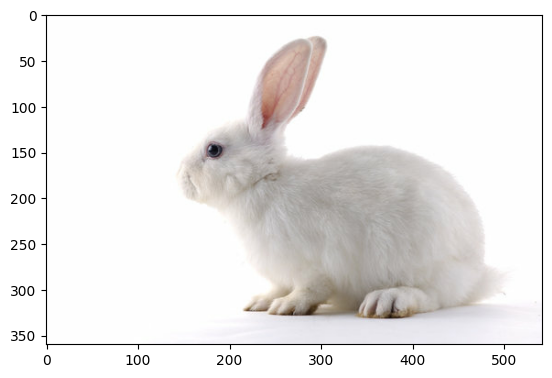

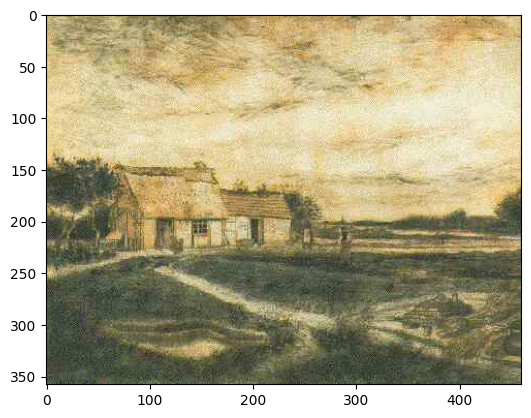

In [59]:
#displaying the input images
plt.imshow(np.squeeze(content_image)) #np.squeeze is used to extract the image shape from the array to display it using matplotlib or to remove the batch size
plt.show()
print('\n')
plt.imshow(np.squeeze(style_image))
plt.show()

Styling the Output

In [60]:
styled_image = model(tf.constant(content_image), tf.constant(style_image))[0]
#Pretrained model is used. Content and style images are passed to the model and extracting the first result ([0]).
#tf.constant() - to make constant tensor with fixed tensor values

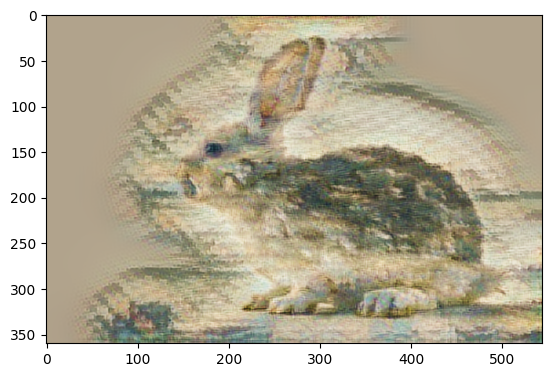

In [61]:
plt.imshow(np.squeeze(styled_image))
#Final output displayed
plt.show()

In [62]:
#exporting the image
cv2.imwrite('./generatedImages/generated_image_{}.jpg', cv2.cvtColor(np.squeeze(styled_image)*255, cv2.COLOR_BGR2RGB))

True